# Data preparation using spark library

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()
spark

25/04/09 20:06:20 WARN Utils: Your hostname, MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.100.64 instead (on interface en0)
25/04/09 20:06:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/09 20:06:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/09 20:06:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Loading the data file: csv

In [3]:
import os

data_path = "/Users/macbook/Development/sun_eu/data/"
csv_file_path = os.path.join(data_path, "02_interim/brandenburger_tor_hourly_cleaned.csv") 
csv_file_path 

'/Users/macbook/Development/sun_eu/data/02_interim/brandenburger_tor_hourly_cleaned.csv'

### csv file

In [4]:
# chechking the csv file
df = spark.read.csv(csv_file_path, header=True)
df.show(10)

+-------------+------+-----+-----+-----+-----+-----+-----+---+
|         time|     P|Gb(i)|Gd(i)|Gr(i)|H_sun|  T2m|WS10m|Int|
+-------------+------+-----+-----+-----+-----+-----+-----+---+
|20200101:0011|   0.0|  0.0|  0.0|  0.0|  0.0|  1.8| 2.34|0.0|
|20200101:0111|   0.0|  0.0|  0.0|  0.0|  0.0| 1.48| 2.41|0.0|
|20200101:0211|   0.0|  0.0|  0.0|  0.0|  0.0| 1.04| 2.34|0.0|
|20200101:0311|   0.0|  0.0|  0.0|  0.0|  0.0| 0.64| 2.21|0.0|
|20200101:0411|   0.0|  0.0|  0.0|  0.0|  0.0| 0.21| 2.14|0.0|
|20200101:0511|   0.0|  0.0|  0.0|  0.0|  0.0|-0.06| 2.21|0.0|
|20200101:0611|   0.0|  0.0|  0.0|  0.0|  0.0|-0.27| 2.21|0.0|
|20200101:0711|   0.0|  0.0|  0.0|  0.0|  0.0|-0.22| 2.14|0.0|
|20200101:0811| 80.73|  6.0|30.45|  0.0| 5.04|-0.11|  2.0|0.0|
|20200101:0911|332.14| 31.0| 77.0|  0.0|10.15|  0.8| 1.86|0.0|
+-------------+------+-----+-----+-----+-----+-----+-----+---+
only showing top 10 rows



In [5]:
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- P: string (nullable = true)
 |-- Gb(i): string (nullable = true)
 |-- Gd(i): string (nullable = true)
 |-- Gr(i): string (nullable = true)
 |-- H_sun: string (nullable = true)
 |-- T2m: string (nullable = true)
 |-- WS10m: string (nullable = true)
 |-- Int: string (nullable = true)



In [6]:
# number of rows
df.count()

35064

In [7]:
df.describe().show()

25/04/09 20:06:24 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------+------------------+-----------------+-----------------+-----+------------------+------------------+------------------+-----+
|summary|         time|                 P|            Gb(i)|            Gd(i)|Gr(i)|             H_sun|               T2m|             WS10m|  Int|
+-------+-------------+------------------+-----------------+-----------------+-----+------------------+------------------+------------------+-----+
|  count|        35064|             35064|            35064|            35064|35064|             35064|             35064|             35064|35064|
|   mean|         NULL|452.37954768423333|65.94363649326807|64.15673054985193|  0.0| 12.51085928587735|10.926119952087593|2.9964114191193003|  0.0|
| stddev|         NULL| 750.3328695281152|145.0733123157482|94.58489516420389|  0.0|17.085739053735423|   8.0570674768552|1.4123600614316332|  0.0|
|    min|20200101:0011|               0.0|              0.0|              0.0|  0.0|               0.0|         

## Data manipulation
- change the column names
- change the column data types: time to timestamp, Gb(i) to Gb, Gd(i) to Gd, Gr(i) to float...

In [8]:
import  pyspark.sql.functions  as F

# change time column to timestamp
timestamp_format = 'yyyyMMdd:HHmm' 
df2 = df.withColumn("time", F.to_timestamp(F.col("time"), timestamp_format))
df2.show(10)
df2.printSchema()

+-------------------+------+-----+-----+-----+-----+-----+-----+---+
|               time|     P|Gb(i)|Gd(i)|Gr(i)|H_sun|  T2m|WS10m|Int|
+-------------------+------+-----+-----+-----+-----+-----+-----+---+
|2020-01-01 00:11:00|   0.0|  0.0|  0.0|  0.0|  0.0|  1.8| 2.34|0.0|
|2020-01-01 01:11:00|   0.0|  0.0|  0.0|  0.0|  0.0| 1.48| 2.41|0.0|
|2020-01-01 02:11:00|   0.0|  0.0|  0.0|  0.0|  0.0| 1.04| 2.34|0.0|
|2020-01-01 03:11:00|   0.0|  0.0|  0.0|  0.0|  0.0| 0.64| 2.21|0.0|
|2020-01-01 04:11:00|   0.0|  0.0|  0.0|  0.0|  0.0| 0.21| 2.14|0.0|
|2020-01-01 05:11:00|   0.0|  0.0|  0.0|  0.0|  0.0|-0.06| 2.21|0.0|
|2020-01-01 06:11:00|   0.0|  0.0|  0.0|  0.0|  0.0|-0.27| 2.21|0.0|
|2020-01-01 07:11:00|   0.0|  0.0|  0.0|  0.0|  0.0|-0.22| 2.14|0.0|
|2020-01-01 08:11:00| 80.73|  6.0|30.45|  0.0| 5.04|-0.11|  2.0|0.0|
|2020-01-01 09:11:00|332.14| 31.0| 77.0|  0.0|10.15|  0.8| 1.86|0.0|
+-------------------+------+-----+-----+-----+-----+-----+-----+---+
only showing top 10 rows

root
 |-

In [9]:
# rename columns

df3_rename = df2

columns_to_rename = {
    "time": "timestamp",
    "P": "power_output",
    "Gb(i)":"direct_irradiance",
    "Gd(i)":"diffuse_irradiance",
    "Gr(i)": "reflect_irradiance",
    "H_sun":"sun_height",
    "T2m":"air_temperature",
    "WS10m":"wind_speed_at_10m",
    "Int":"Int"
}

for old_name, new_name in columns_to_rename.items():
    df3_rename = df3_rename.withColumnRenamed(old_name, new_name)
    
df3_rename.printSchema()
df3_rename.show(5)

root
 |-- timestamp: timestamp (nullable = true)
 |-- power_output: string (nullable = true)
 |-- direct_irradiance: string (nullable = true)
 |-- diffuse_irradiance: string (nullable = true)
 |-- reflect_irradiance: string (nullable = true)
 |-- sun_height: string (nullable = true)
 |-- air_temperature: string (nullable = true)
 |-- wind_speed_at_10m: string (nullable = true)
 |-- Int: string (nullable = true)

+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+---+
|          timestamp|power_output|direct_irradiance|diffuse_irradiance|reflect_irradiance|sun_height|air_temperature|wind_speed_at_10m|Int|
+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+---+
|2020-01-01 00:11:00|         0.0|              0.0|               0.0|               0.0|       0.0|            1.8|             2.34|0.0|
|2020-01-01 01:11:00|   

In [10]:
import pyspark.sql.types as T
import pyspark.sql.functions  as F

df4_retyped = df3_rename 

target_type = T.DoubleType()
columns_to_cast = [
    "power_output",
    "direct_irradiance",
    "diffuse_irradiance",
    "reflect_irradiance",
    "sun_height",
    "air_temperature",
    "wind_speed_at_10m",
    "Int"
]
for cols in columns_to_cast:
    df4_retyped = df4_retyped.withColumn(cols, F.col(cols).cast(target_type))

#df4_retyped.withColumn("wind_speed_at_10m", F.col('wind_speed_at_10m').cast(T.IntegerType()))
df4_retyped.printSchema()
df4_retyped.show(5)

root
 |-- timestamp: timestamp (nullable = true)
 |-- power_output: double (nullable = true)
 |-- direct_irradiance: double (nullable = true)
 |-- diffuse_irradiance: double (nullable = true)
 |-- reflect_irradiance: double (nullable = true)
 |-- sun_height: double (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- wind_speed_at_10m: double (nullable = true)
 |-- Int: double (nullable = true)

+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+---+
|          timestamp|power_output|direct_irradiance|diffuse_irradiance|reflect_irradiance|sun_height|air_temperature|wind_speed_at_10m|Int|
+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+---+
|2020-01-01 00:11:00|         0.0|              0.0|               0.0|               0.0|       0.0|            1.8|             2.34|0.0|
|2020-01-01 01:11:00|   

In [11]:
df4_retyped.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----+
|summary|      power_output|direct_irradiance|diffuse_irradiance|reflect_irradiance|        sun_height|   air_temperature| wind_speed_at_10m|  Int|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----+
|  count|             35064|            35064|             35064|             35064|             35064|             35064|             35064|35064|
|   mean|452.37954768423333|65.94363649326807| 64.15673054985193|               0.0| 12.51085928587735|10.926119952087593|2.9964114191193003|  0.0|
| stddev| 750.3328695281152|145.0733123157482| 94.58489516420389|               0.0|17.085739053735423|   8.0570674768552|1.4123600614316332|  0.0|
|    min|               0.0|              0.0|               0.0|               0.0|               0.0|         

In [12]:
df4_retyped.agg(F.max("air_temperature")).show()
df4_retyped.agg(F.avg("air_temperature")).show()

+--------------------+
|max(air_temperature)|
+--------------------+
|               37.48|
+--------------------+

+--------------------+
|avg(air_temperature)|
+--------------------+
|  10.926119952087593|
+--------------------+



In [13]:
# remove column 'int'
df5_drop = df4_retyped.drop("Int")
df5_drop.printSchema()
df5_drop.show(5)

root
 |-- timestamp: timestamp (nullable = true)
 |-- power_output: double (nullable = true)
 |-- direct_irradiance: double (nullable = true)
 |-- diffuse_irradiance: double (nullable = true)
 |-- reflect_irradiance: double (nullable = true)
 |-- sun_height: double (nullable = true)
 |-- air_temperature: double (nullable = true)
 |-- wind_speed_at_10m: double (nullable = true)

+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+
|          timestamp|power_output|direct_irradiance|diffuse_irradiance|reflect_irradiance|sun_height|air_temperature|wind_speed_at_10m|
+-------------------+------------+-----------------+------------------+------------------+----------+---------------+-----------------+
|2020-01-01 00:11:00|         0.0|              0.0|               0.0|               0.0|       0.0|            1.8|             2.34|
|2020-01-01 01:11:00|         0.0|              0.0|               0.0|    

In [14]:
# checking the distinc values in reflect_irradiance. if 1, drop columns
df5_drop.select('reflect_irradiance').distinct().count()

df5_drop = df5_drop.drop('reflect_irradiance')
df5_drop.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|      power_output|direct_irradiance|diffuse_irradiance|        sun_height|   air_temperature| wind_speed_at_10m|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|             35064|            35064|             35064|             35064|             35064|             35064|
|   mean|452.37954768423333|65.94363649326807| 64.15673054985193| 12.51085928587735|10.926119952087593|2.9964114191193003|
| stddev| 750.3328695281152|145.0733123157482| 94.58489516420389|17.085739053735423|   8.0570674768552|1.4123600614316332|
|    min|               0.0|              0.0|               0.0|               0.0|            -15.77|               0.0|
|    max|           3308.54|           783.01|             434.0|             60.92|             37.48|             11.03|
+-------+-------

## EDA

In [15]:
# count null values
df5_drop.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df5_drop.columns]).show()


+---------+------------+-----------------+------------------+----------+---------------+-----------------+
|timestamp|power_output|direct_irradiance|diffuse_irradiance|sun_height|air_temperature|wind_speed_at_10m|
+---------+------------+-----------------+------------------+----------+---------------+-----------------+
|        0|           0|                0|                 0|         0|              0|                0|
+---------+------------+-----------------+------------------+----------+---------------+-----------------+



In [16]:
# --- create subset with a specific time range ---
start_date = "2023-01-01"
end_date = "2023-12-31"

# turn the subset to panda dataframe
df_subset_2023 = df5_drop.filter(
                    (F.col("timestamp") >= F.lit(start_date)) &
                    (F.col("timestamp") < F.lit(end_date))
                 ).toPandas()
df_subset_2023.head()

,timestamp,power_output,direct_irradiance,diffuse_irradiance,sun_height,air_temperature,wind_speed_at_10m
0,2023-01-01 00:11:00,0.0,0.0,0.0,0.0,14.86,6.41
1,2023-01-01 01:11:00,0.0,0.0,0.0,0.0,14.83,6.28
2,2023-01-01 02:11:00,0.0,0.0,0.0,0.0,14.63,6.21
3,2023-01-01 03:11:00,0.0,0.0,0.0,0.0,14.42,5.93
4,2023-01-01 04:11:00,0.0,0.0,0.0,0.0,14.19,5.59


In [17]:
round(df_subset_2023.describe())

,timestamp,power_output,direct_irradiance,diffuse_irradiance,sun_height,air_temperature,wind_speed_at_10m
count,8736,8736.0,8736.0,8736.0,8736.0,8736.0,8736.0
mean,2023-07-01 23:40:59.999999488,447.0,65.0,64.0,13.0,11.0,3.0
min,2023-01-01 00:11:00,0.0,0.0,0.0,0.0,-8.0,0.0
25%,2023-04-01 23:56:00,0.0,0.0,0.0,0.0,5.0,2.0
50%,2023-07-01 23:41:00,0.0,0.0,0.0,0.0,11.0,3.0
75%,2023-09-30 23:26:00,588.0,29.0,110.0,22.0,18.0,4.0
max,2023-12-30 23:11:00,3309.0,776.0,434.0,61.0,35.0,9.0
std,NaN,753.0,147.0,94.0,17.0,8.0,1.0


In [18]:
# --- create subset with a specific time range ---
start_date = "2023-07-01"
end_date = "2023-07-31"

# turn the subset to panda dataframe
df_subset_2023_july= df5_drop.filter(
                    (F.col("timestamp") >= F.lit(start_date)) &
                    (F.col("timestamp") < F.lit(end_date))
                 ).toPandas()
df_subset_2023_july.head()

,timestamp,power_output,direct_irradiance,diffuse_irradiance,sun_height,air_temperature,wind_speed_at_10m
0,2023-07-01 00:11:00,0.0,0.0,0.0,0.00,16.20,1.52
1,2023-07-01 01:11:00,0.0,0.0,0.0,0.00,15.84,1.45
2,2023-07-01 02:11:00,0.0,0.0,0.0,0.00,15.73,1.38
3,2023-07-01 03:11:00,0.0,0.0,1.0,1.93,15.64,1.45
4,2023-07-01 04:11:00,31.1,0.0,19.0,9.72,15.61,1.59


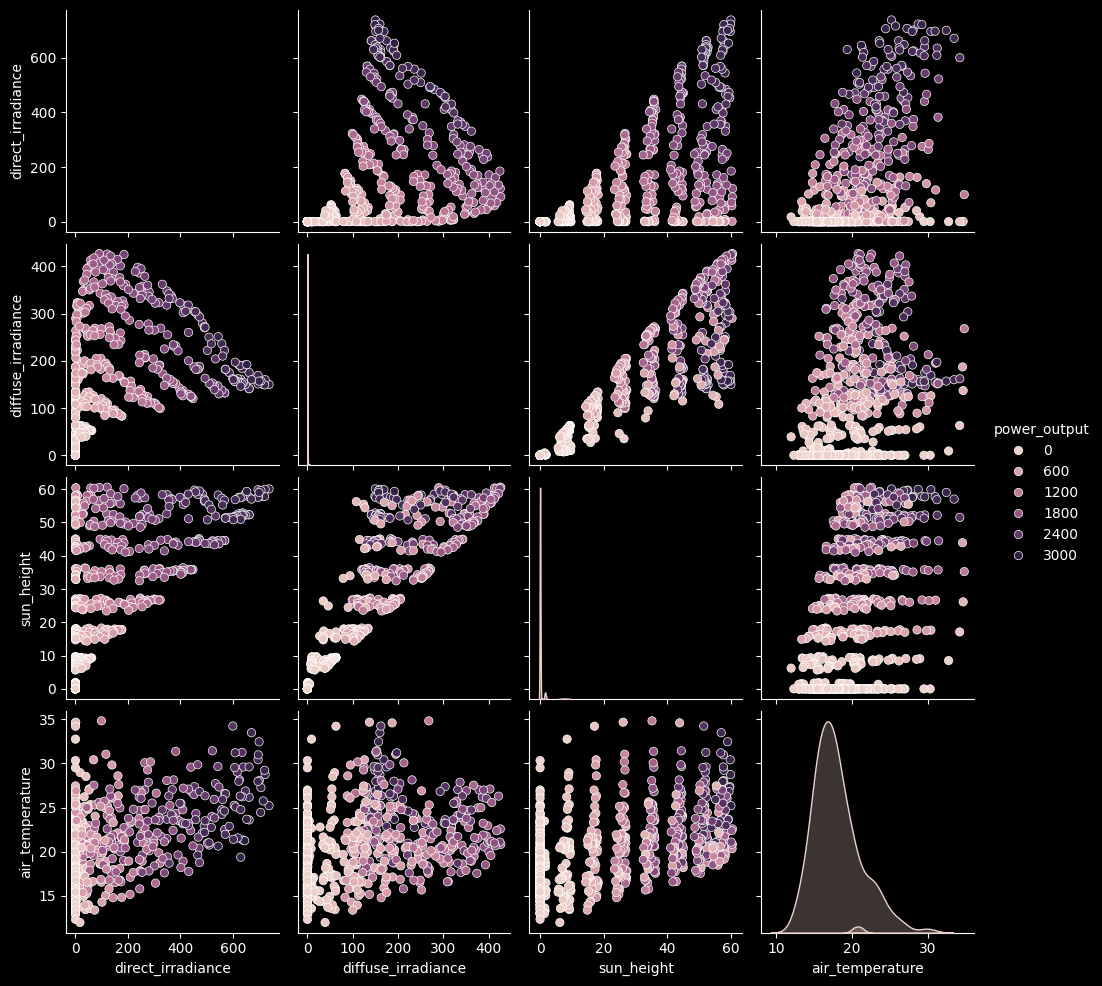

In [60]:
import seaborn as sns
import matplotlib as plt

#plt.style.use("dark_background")

cols_for_pairplot = [
    'power_output',
    'direct_irradiance',
    'diffuse_irradiance',
    'sun_height',
    'air_temperature',
]

pairplot_fig = sns.pairplot(
   df_subset_2023_july[cols_for_pairplot],
   kind='scatter',  # ‘scatter’, ‘kde’, ‘hist’, ‘reg’
   hue='power_output',
   aspect=1,
   diag_kind='kde', 
   #plot_kws={'alpha': 0.7, 's': 20},
   dropna=True,
   #corner=True,
   #palette='Dark2'
)

pairplot_fig

In [61]:
import plotly.graph_objects as go
import plotly.express as px

In [77]:
# correlation matrix 
corr_matrix = df_subset_2023.drop('timestamp',axis=1).corr()

fig_corr = px.imshow(
    corr_matrix,
    text_auto=True,          # Automatically display correlation values on the heatmap
    aspect="auto",          
    color_continuous_scale=px.colors.diverging.RdBu_r, # Red-Blue diverging scale (good for +/- corr)
    range_color=[-1, 1],     # Ensure color scale covers the full range -1 to 1
    title='Feature Correlation Matrix',
    template='plotly_dark'   # Or your preferred theme
)

fig_corr.show()

In [ ]:
irradiance_fig = px.line(
    df_subset_2023, 
    x='timestamp',
    y=['direct_irradiance', 'diffuse_irradiance'],
    title='Direct and diffuse irradiance over Time (2023)',
    labels={'value': 'Value', 'variable': 'Time'},
    template='plotly_dark',
    )

irradiance_fig


In [69]:
# --- Plot Sun Height and Temperature over time ---
sun_temp_fig = px.line(df_subset_2023, 
                        x='timestamp',
                        y=['sun_height', 'air_temperature'],
                        title='Sun Height and Temperature over Time (July 2023)',
                        labels={'value': 'Value', 'variable': 'Metrics'},
                        template='plotly_dark')

sun_temp_fig.update_layout(hovermode="x unified")
sun_temp_fig

In [ ]:
# create a function for reuse scatter plots
import pandas as pd

def create_scatter_plot(
    data_df: pd.DataFrame,
    x: str,
    y: str,
    color: str = None, # Optional: Column to color points by
    title: str = None,     # Optional: Custom title
    labels: dict = None,   # Optional: Custom labels for axes/color
    hover_data: list = None, # Optional: Custom hover data columns
    opacity: float = 0.8,  # Default opacity (adjust as needed)
    template: str = 'plotly_dark', # Default template
    color_scale: str = px.colors.sequential.RdBu_r # Default color scale
    
    ):
    """
    Creates an interactive scatter plot using Plotly Express.

    Args:
        data_df: The Pandas DataFrame containing the data.
        x_col: The name of the column for the X-axis.
        y_col: The name of the column for the Y-axis.
        color_col: The name of the column to use for coloring points. (Optional)
        title: Custom title for the plot. If None, a default title is generated. (Optional)
        labels: Dictionary to override default axis/color labels
                (e.g., {'x_col_name': 'X Label', 'y_col_name': 'Y Label', 'color_col_name': 'Color Label'}). (Optional)
        hover_data: List of column names to show in the hover tooltip. (Optional)
        opacity: Opacity of the scatter points (0 to 1). (Default: 0.7)
        template: Plotly template name (e.g., 'plotly_dark', 'ggplot2'). (Default: 'plotly_dark')
        color_scale: Plotly sequential color scale name if color_col is numeric.
                     (Default: px.colors.sequential.Viridis)

    Returns:
        plotly.graph_objects.Figure: The Plotly figure object.
    """
    
    # --- Create the Scatter Plot ---
    fig = px.scatter(
        data_df,
        x=x,
        y=y,
        color=color if color else None, 
        opacity=opacity,
        hover_data=hover_data,
        title=title,
        template=template,
        color_continuous_scale=color_scale if color else None,
        labels=labels if labels else None
    )

    return fig

In [ ]:
pw_direct_irradiance = create_scatter_plot(
                df_subset_2023, 
                x='direct_irradiance',
                y='power_output',
                color='air_temperature',
                title='Power Output vs. Direct Irradiance (Colored by Temperature)',
                labels={'direct_irradiance': 'Direct Irradiance (W/m²)',
                        'power_output': 'Power Output (kW?)',
                        'air_temperature': 'Air Temp (°C)'})

pw_direct_irradiance.show()

In [ ]:
# --- Plot Power Output vs. Diffuse Irradiance 

pw_diffuse_irradiance = create_scatter_plot(
                df_subset_2023,
                x='diffuse_irradiance',
                y='power_output',
                color='air_temperature',
                title='Power Output vs. Diffuse Irradiance (Colored by Temperature)',
                labels={'direct_irradiance': 'Direct Irradiance (W/m²)',
                            'power_output': 'Power Output (kW?)',
                            'air_temperature': 'Air Temp (°C)'})

pw_diffuse_irradiance.show()

In [ ]:
sun_height_irradiance = create_scatter_plot(
                df_subset_2023, 
                x='direct_irradiance',
                y='sun_height',
                color='direct_irradiance',
                title='Direct Irradiance vs Solar height',
                labels={'direct_irradiance': 'Direct Irradiance (W/m²)',
                        'sun_height': 'Sun Elevation (in °)',
                        }
                )


sun_height_irradiance.show()

In [ ]:
# --- Histogram for Power Output ---
pw_histogram = px.histogram(df_subset_2023, x='power_output',
                     nbins=25, 
                     title='Distribution of Power Output',
                     template='plotly_dark',
                     labels={'power_output': 'Power Output (kWp)'})
pw_histogram.show()

In [ ]:
# --- Histogram for Air Temperature ---
air_temp_histogram = px.histogram(df_subset_2023, x='air_temperature',
                     nbins=50,
                     title=' Air temperature distribution',
                     template='plotly_dark',
                     labels={'air_temperature': 'Air Temperature (°C)'})
air_temp_histogram.show()

### write file to disk: parquet or csv

In [ ]:
output_path = "/Users/macbook/Development/sun_eu/data/02_interim/brandenburger_tor_hourly_cleaned.csv"
df5_drop.write.csv(output_path, mode="overwrite", header=True)

In [1]:
output_path = "/Users/macbook/Development/sun_eu/data/02_interim/brandenburger_tor_hourly_cleaned.parquet"
df5_drop.write.parquet(output_path, mode="overwrite", compression="snappy")

NameError: name 'df5_drop' is not defined